In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
diabetes_df=pd.read_csv("diabetesdata.csv")

In [11]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Exploratory Data Analysis(EDA)

In [12]:
#Checking columns
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
#Information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Cleaning

In [15]:
#Checking if null values are present
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are 0 as value for Glucose, BloodPressure, SkinThickness, Insulin and BMI

In [20]:
#replacing these 0's with NaN
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [21]:
diabetes_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [22]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Visualizing each columns

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

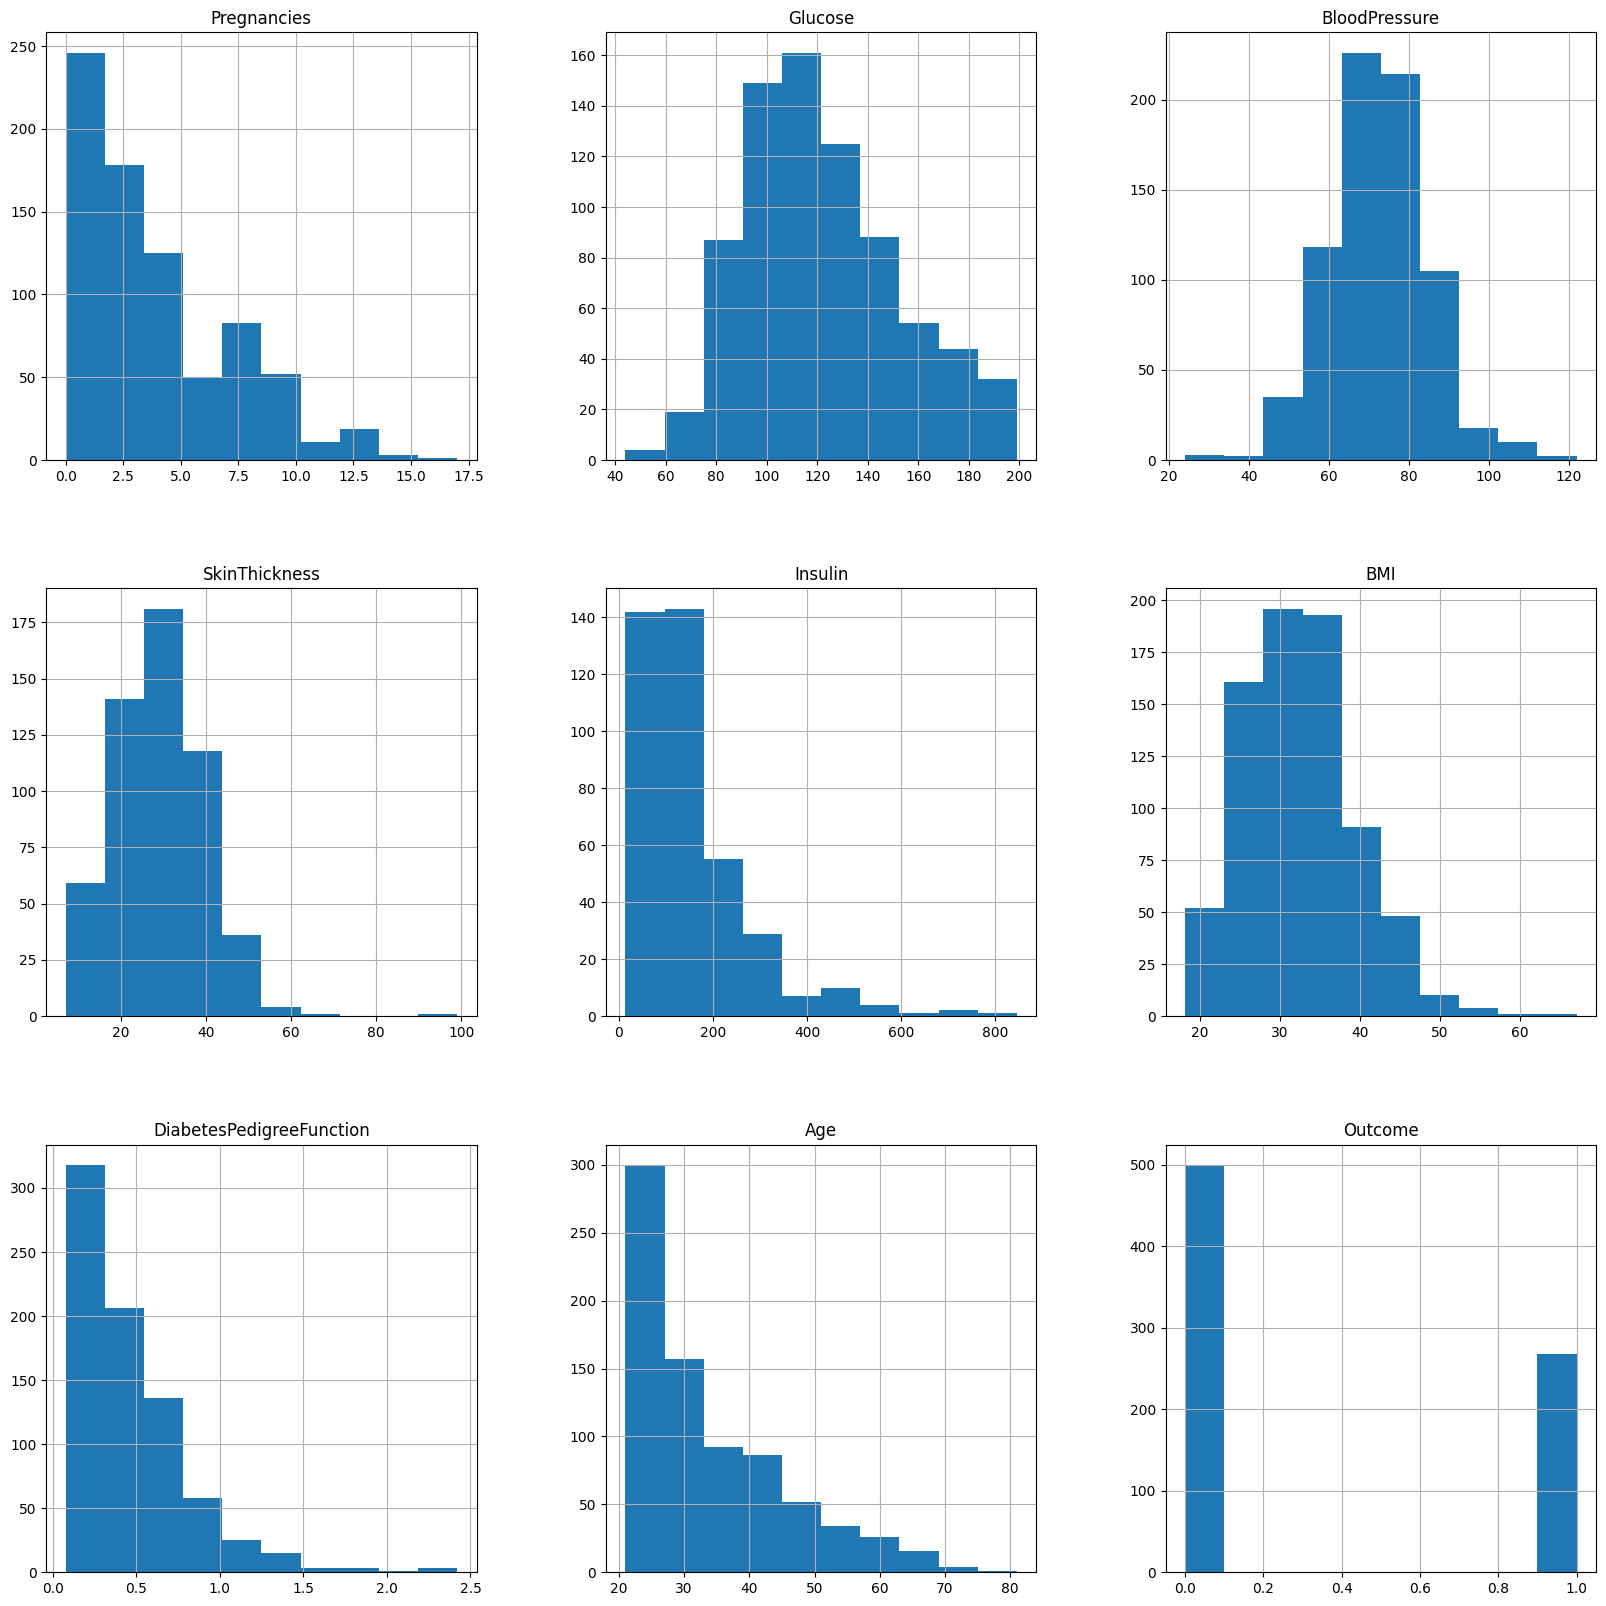

In [31]:
diabetes_df.hist(figsize=(20,20))

In [29]:
diabetes_df[diabetes_df["DiabetesPedigreeFunction"]>2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
370,3,173.0,82.0,48.0,465.0,38.4,2.137,25,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1


In [30]:
diabetes_df['DiabetesPedigreeFunction'].mean()

0.47187630208333325

In [32]:
diabetes_df["Glucose"].mean()

121.6867627785059

In [33]:
diabetes_df["Glucose"].fillna(diabetes_df["Glucose"].mean(),inplace=True)

In [34]:
diabetes_df.Glucose.isnull().sum()

0

In [37]:
diabetes_df[diabetes_df["BloodPressure"].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
15,7,100.0,NaN,NaN,NaN,30.0,0.484,32,1
49,7,105.0,NaN,NaN,NaN,NaN,0.305,24,0
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21,0
78,0,131.0,NaN,NaN,NaN,43.2,0.270,26,1
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22,0
172,2,87.0,NaN,23.0,NaN,28.9,0.773,25,0
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
222,7,119.0,NaN,NaN,NaN,25.2,0.209,37,0
261,3,141.0,NaN,NaN,NaN,30.0,0.761,27,1


In [44]:
diabetes_df[~diabetes_df["BloodPressure"].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [45]:
diabetes_df["BloodPressure"].mean()

72.40518417462484

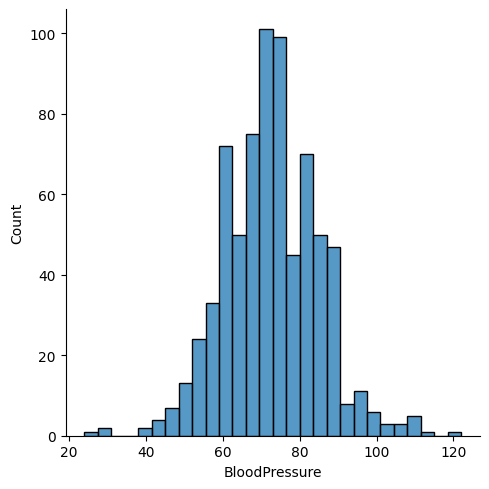

In [47]:
sns.displot(diabetes_df["BloodPressure"])

In [48]:
diabetes_df["BloodPressure"].median()

72.0

In [50]:
diabetes_df["BloodPressure"].fillna(diabetes_df["BloodPressure"].median(),inplace=True)

In [51]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [52]:
#replacing SkinThickness, Insulin and BMI with median values
diabetes_df["SkinThickness"].fillna(diabetes_df["SkinThickness"].median(),inplace=True)
diabetes_df["Insulin"].fillna(diabetes_df["Insulin"].median(),inplace=True)
diabetes_df["BMI"].fillna(diabetes_df["BMI"].median(),inplace=True)

In [53]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

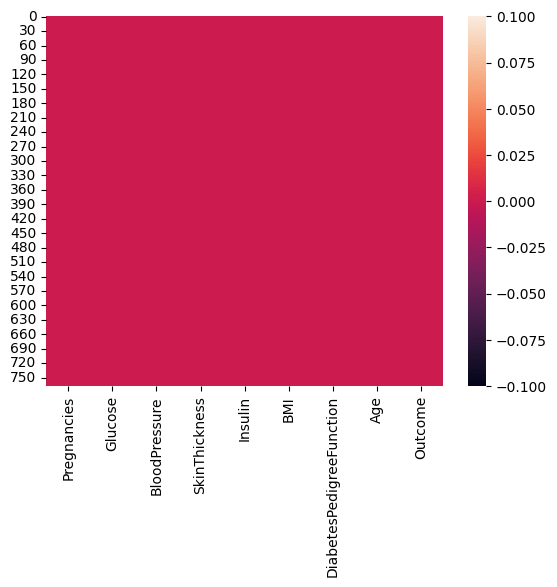

In [54]:
sns.heatmap(diabetes_df.isnull())

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

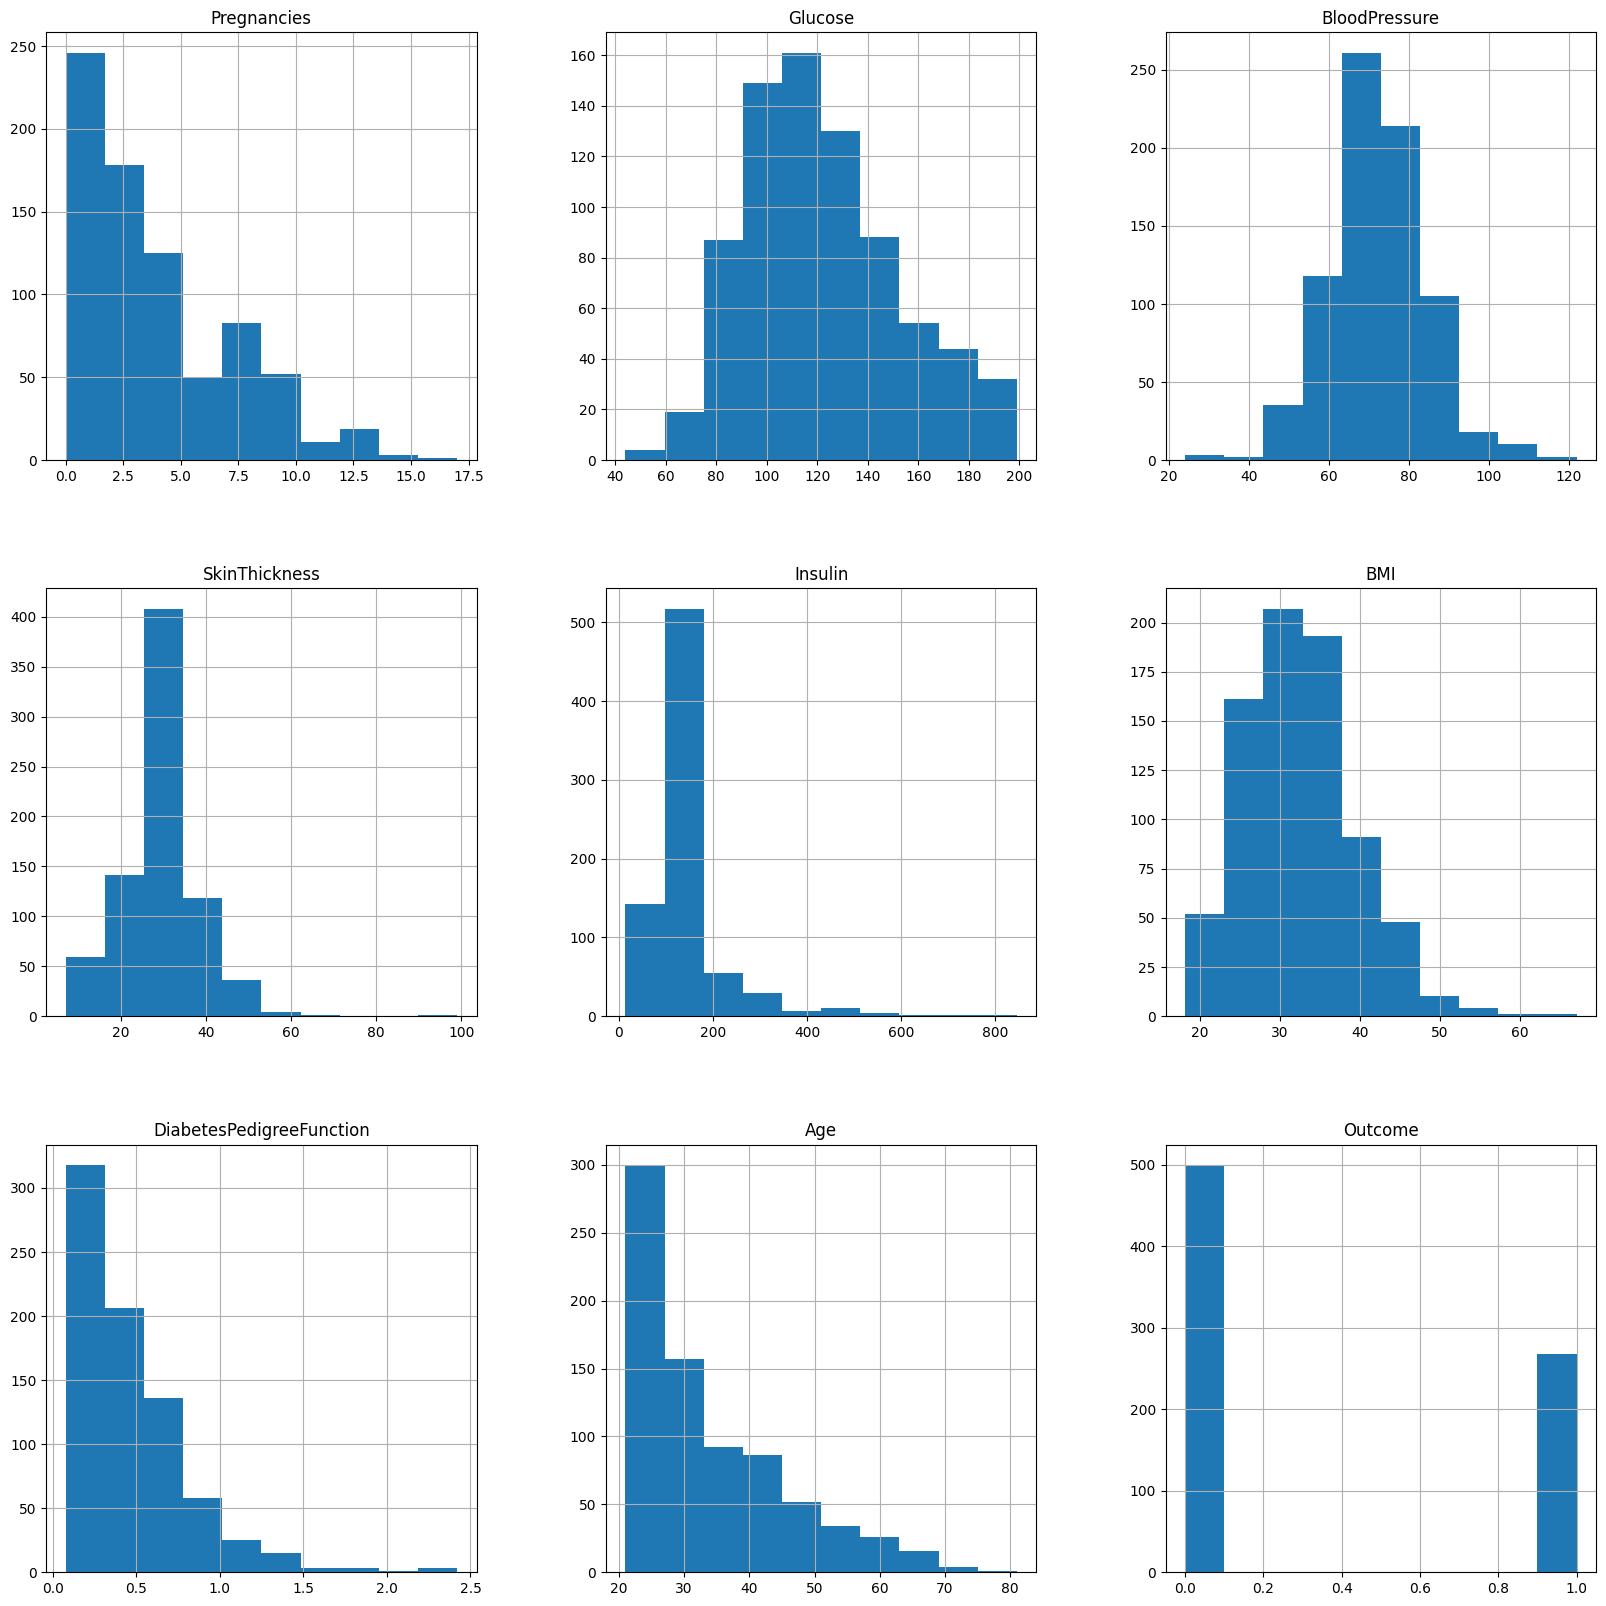

In [55]:
diabetes_df.hist(figsize=(20,20))

Checking if the dataset is imbalanced or not

In [56]:
diabetes_df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Diabetic patients are atmost half of patients who are not diabetic

<Axes: >

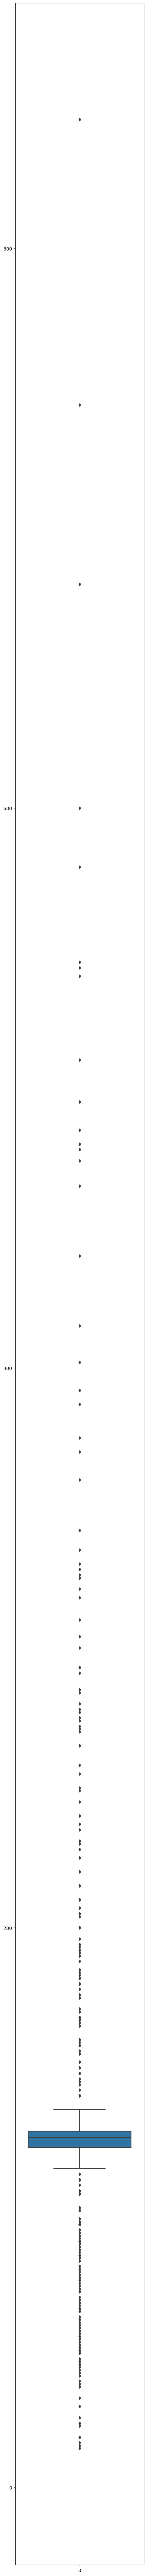

In [64]:
plt.figure(figsize=(5,100))
sns.boxplot(data=diabetes_df["Insulin"])

<Axes: >

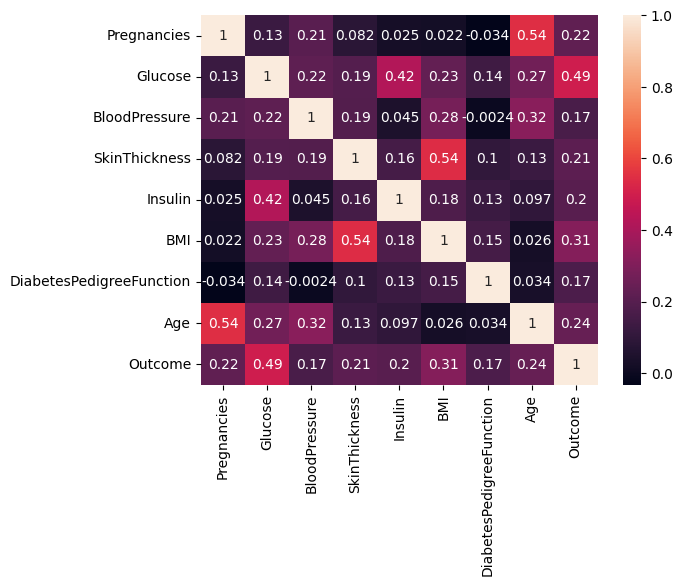

In [65]:
sns.heatmap(diabetes_df.corr(),annot=True)

In [67]:
#Balancing the dataset
db=diabetes_df[diabetes_df["Outcome"]==0]
ndb=diabetes_df[diabetes_df["Outcome"]==1]

In [69]:
print(db.shape)
print(ndb.shape)

(500, 9)
(268, 9)


Under Sampling

In [71]:
dbrandom=db.sample(n=268)
dbrandom

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
30,5,109.0,75.0,26.0,125.0,36.0,0.546,60,0
656,2,101.0,58.0,35.0,90.0,21.8,0.155,22,0
622,6,183.0,94.0,29.0,125.0,40.8,1.461,45,0
727,0,141.0,84.0,26.0,125.0,32.4,0.433,22,0
472,0,119.0,66.0,27.0,125.0,38.8,0.259,22,0
...,...,...,...,...,...,...,...,...,...
304,3,150.0,76.0,29.0,125.0,21.0,0.207,37,0
482,4,85.0,58.0,22.0,49.0,27.8,0.306,28,0
325,1,157.0,72.0,21.0,168.0,25.6,0.123,24,0
73,4,129.0,86.0,20.0,270.0,35.1,0.231,23,0


In [72]:
new_diabetes_df=pd.concat([dbrandom,ndb],axis=0)

In [73]:
new_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
30,5,109.0,75.0,26.0,125.0,36.0,0.546,60,0
656,2,101.0,58.0,35.0,90.0,21.8,0.155,22,0
622,6,183.0,94.0,29.0,125.0,40.8,1.461,45,0
727,0,141.0,84.0,26.0,125.0,32.4,0.433,22,0
472,0,119.0,66.0,27.0,125.0,38.8,0.259,22,0


In [76]:
new_diabetes_df.sort_index(inplace=True)

In [78]:
new_diabetes_df.head(200)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
259,11,155.0,76.0,28.0,150.0,33.3,1.353,51,1
260,3,191.0,68.0,15.0,130.0,30.9,0.299,34,0
261,3,141.0,72.0,29.0,125.0,30.0,0.761,27,1
264,4,123.0,62.0,29.0,125.0,32.0,0.226,35,1


In [81]:
new_diabetes_df.reset_index(drop=True,inplace=True)

In [82]:
new_diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
531,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1
532,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
533,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
534,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [83]:
new_diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,3.957090,128.082202,72.916045,30.035448,147.108209,33.203918,0.482782,34.042910,0.500000
std,3.410817,31.970809,12.023592,8.484877,94.099547,6.887727,0.331757,11.716911,0.500467
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000,0.000000
25%,1.000000,104.000000,66.000000,27.000000,125.000000,28.400000,0.253500,25.000000,0.000000
50%,3.000000,125.000000,72.000000,29.000000,125.000000,32.700000,0.387000,30.000000,0.500000
75%,6.000000,151.000000,80.000000,33.000000,135.000000,37.400000,0.648250,41.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data are in different ranges. So, inorder to set the data in same range so that machine learning algorithms can perform better we can use the StandardScaler function in sklearn.preprocessing module

In [84]:
scaler=StandardScaler()

In [90]:
bf_X=new_diabetes_df.drop(["Outcome"],axis=1)
bf_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
531,9,170.0,74.0,31.0,125.0,44.0,0.403,43
532,2,122.0,70.0,27.0,125.0,36.8,0.340,27
533,5,121.0,72.0,23.0,112.0,26.2,0.245,30
534,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [91]:
Y=new_diabetes_df["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
531    1
532    0
533    0
534    1
535    0
Name: Outcome, Length: 536, dtype: int64

In [94]:
#Scaling bf_X
X=pd.DataFrame(scaler.fit_transform(bf_X), columns=['Pregnancies',
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.599510,0.623581,-0.076258,0.585653,-0.235164,0.057559,0.435116,1.363158
1,-0.867784,-1.348807,-0.575744,-0.122149,-0.235164,-0.959691,-0.397594,-0.259945
2,1.186428,1.719353,-0.742239,-0.122149,-0.235164,-1.439251,0.570884,-0.174519
3,-0.867784,-1.223576,-0.575744,-0.829950,-0.564910,-0.741708,-0.952735,-1.114210
4,-1.161243,0.279196,-2.740179,0.585653,0.222225,1.438112,5.446466,-0.089092
...,...,...,...,...,...,...,...,...
531,1.479886,1.312352,0.090237,0.113785,-0.235164,1.568902,-0.240707,0.765172
532,-0.574325,-0.190420,-0.242753,-0.358082,-0.235164,0.522588,-0.430782,-0.601651
533,0.306051,-0.221728,-0.076258,-0.829950,-0.373445,-1.017819,-0.717404,-0.345371
534,-0.867784,-0.065189,-1.075229,-0.122149,-0.235164,-0.451066,-0.403629,1.106878


Splitting dataset into train test

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,
                                                    random_state=2,stratify=Y)

In [99]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(428, 8)
(108, 8)
(428,)
(108,)


Feeding this data into SVM model for the purpose of finding the accuracy

In [100]:
from sklearn.svm import SVC

In [101]:
svc_algo=SVC()

In [103]:
svc_algo.fit(X_train,Y_train)

SVC()

In [105]:
svc_predict=svc_algo.predict(X_test)
svc_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

Accuracy Score

In [106]:
from sklearn import metrics

In [107]:
metrics.accuracy_score(Y_test, svc_predict)

0.7129629629629629

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, svc_predict))
print(classification_report(Y_test,svc_predict))

[[37 17]
 [14 40]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.70        54
           1       0.70      0.74      0.72        54

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108



In [ ]:
print("hello")